In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [103]:
car=pd.read_csv('newbook11.csv')

In [104]:
car.head(15)

,name,company,year,Price,suspension,fuel_type
0,Kia Picanto,Kia,2022,2186000,Manual,Petrol
1,Kia Picanto,Kia,2022,2292000,Automatic,Petrol
2,Kia Stonic EX,Kia,2022,3750000,Automatic,Petrol
3,Kia Stonic EX+,Kia,2022,3975000,Automatic,Petrol
4,Kia Sportage Alpha,Kia,2022,4764000,Automatic,Petrol
5,Kia Sportage AWD,Kia,2022,5276000,Automatic,Petrol
6,Kia Sportage FWD,Kia,2022,5800000,Automatic,Petrol
7,Kia Carnival GLS,Kia,2022,9199000,Automatic,Petrol
8,Kia Carnival GLS+,Kia,2022,9999000,Automatic,Diesel
9,Kia Sorento FWD,Kia,2021,6836000,Automatic,Petrol


In [105]:
car.shape

(138, 6)

In [106]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        138 non-null    object
 1   company     138 non-null    object
 2   year        138 non-null    int64 
 3   Price       138 non-null    int64 
 4   suspension  138 non-null    object
 5   fuel_type   138 non-null    object
dtypes: int64(2), object(4)
memory usage: 6.6+ KB


In [107]:
car.describe(include='all')

,name,company,year,Price,suspension,fuel_type
count,138,138,138.000000,1.380000e+02,138,138
unique,84,7,NaN,NaN,3,2
top,Kia Picanto,Toyota,NaN,NaN,Automatic,Petrol
freq,4,48,NaN,NaN,124,125
mean,NaN,NaN,2021.434783,6.763214e+06,NaN,NaN
std,NaN,NaN,0.497534,9.617879e+06,NaN,NaN
min,NaN,NaN,2021.000000,1.117000e+06,NaN,NaN
25%,NaN,NaN,2021.000000,2.566500e+06,NaN,NaN
50%,NaN,NaN,2021.000000,3.879000e+06,NaN,NaN
75%,NaN,NaN,2022.000000,6.743250e+06,NaN,NaN


In [108]:
car=car[car['Price']<100000000]

In [109]:
car['company'].unique()

array(['Kia', 'Suzuki', 'Toyota', 'Changan', 'Proton', 'Hyundai', 'Honda'],
      dtype=object)

In [110]:
import seaborn as sns

C:\Users\Muhammad Sameer\AppData\Local\Temp\ipykernel_12924\2788130517.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


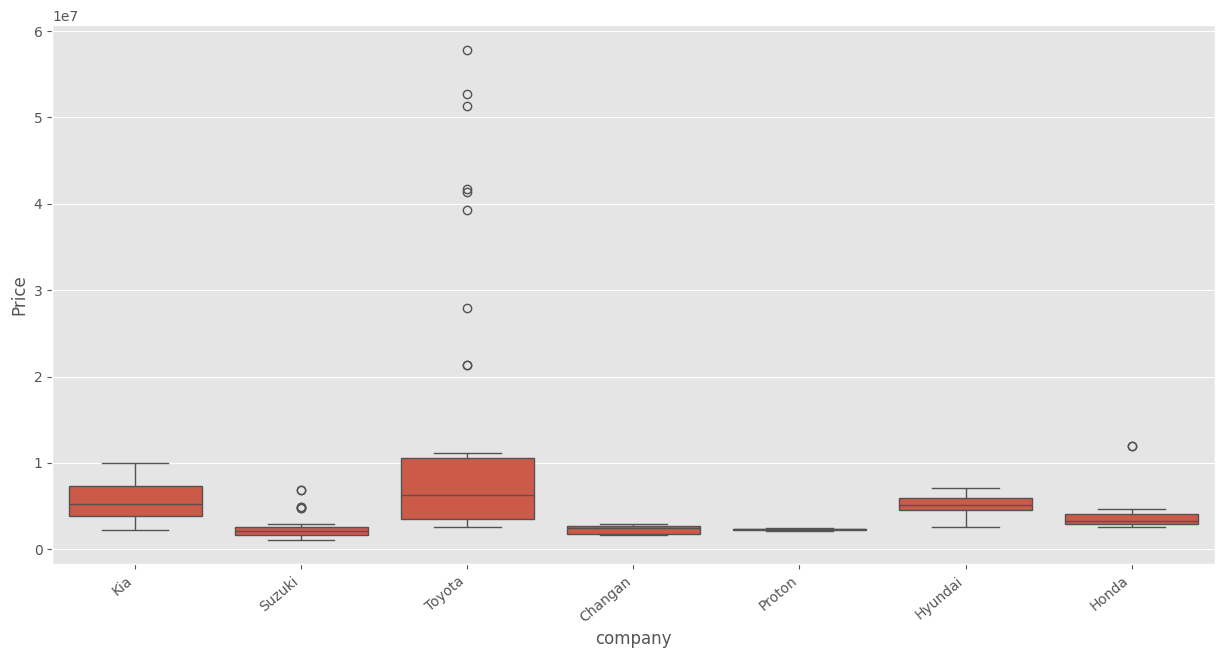

In [111]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

C:\Users\Muhammad Sameer\AppData\Local\Temp\ipykernel_12924\2542042277.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


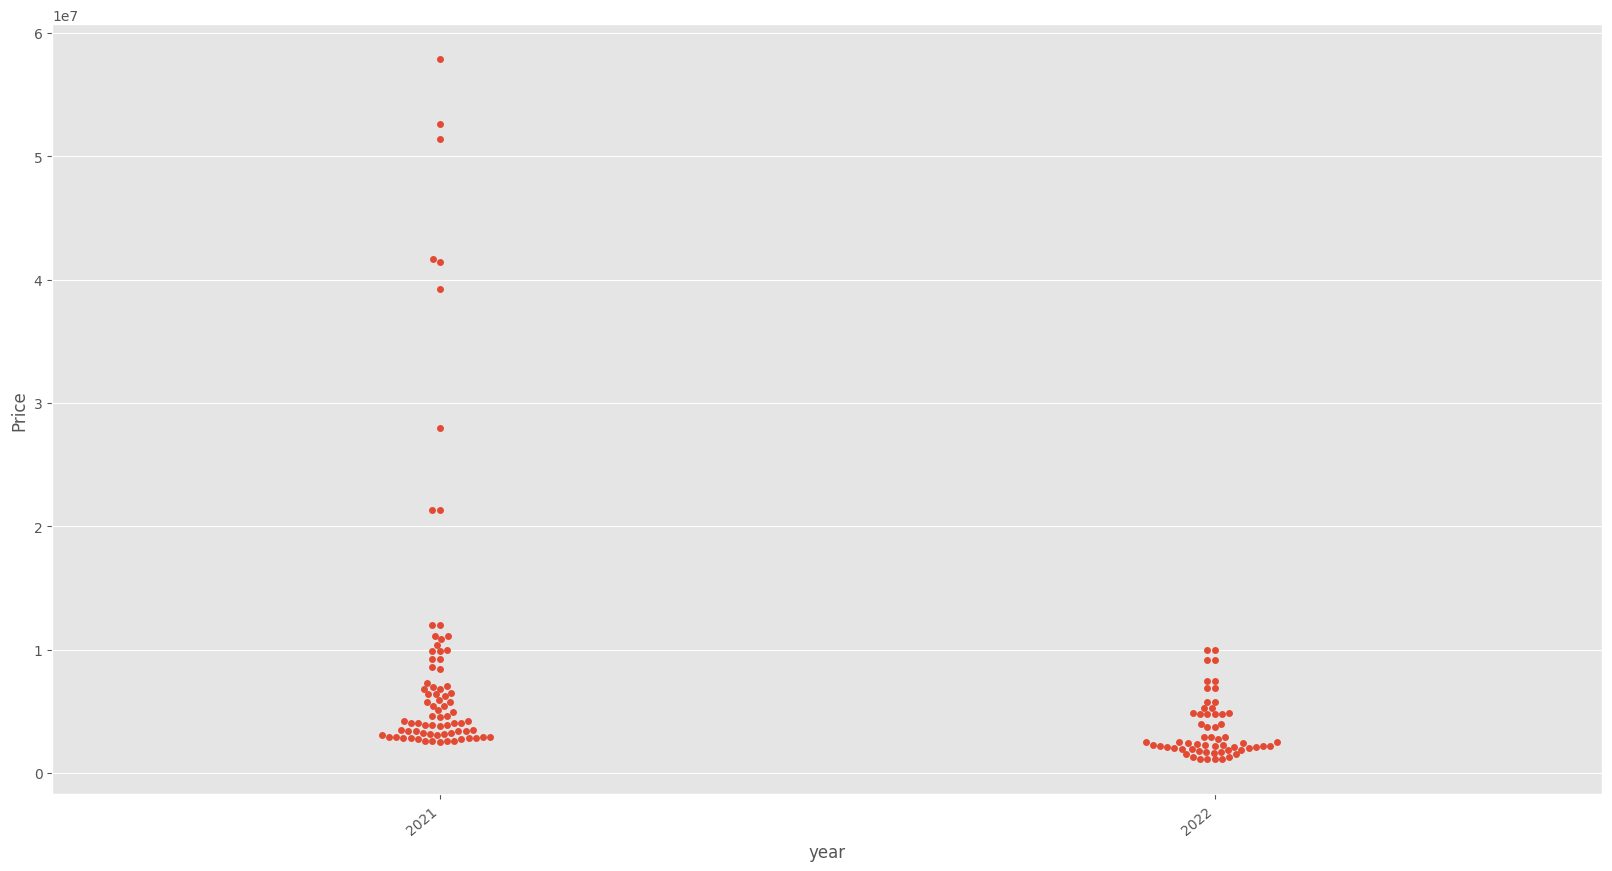

In [112]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

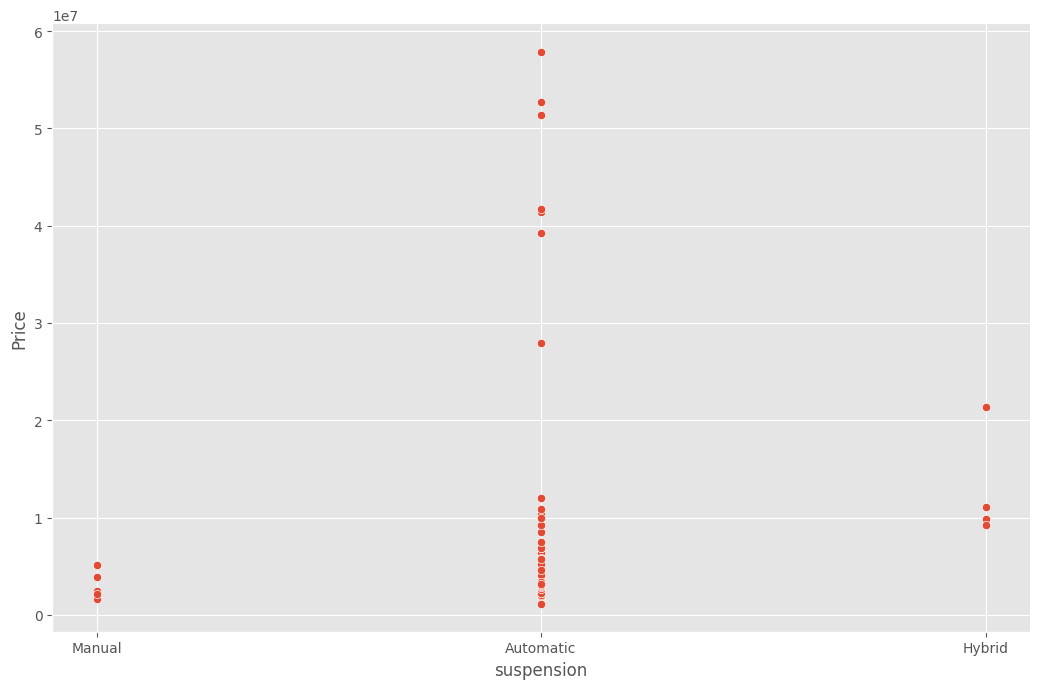

In [113]:
sns.relplot(x='suspension',y='Price',data=car,height=7,aspect=1.5)

<Axes: xlabel='fuel_type', ylabel='Price'>

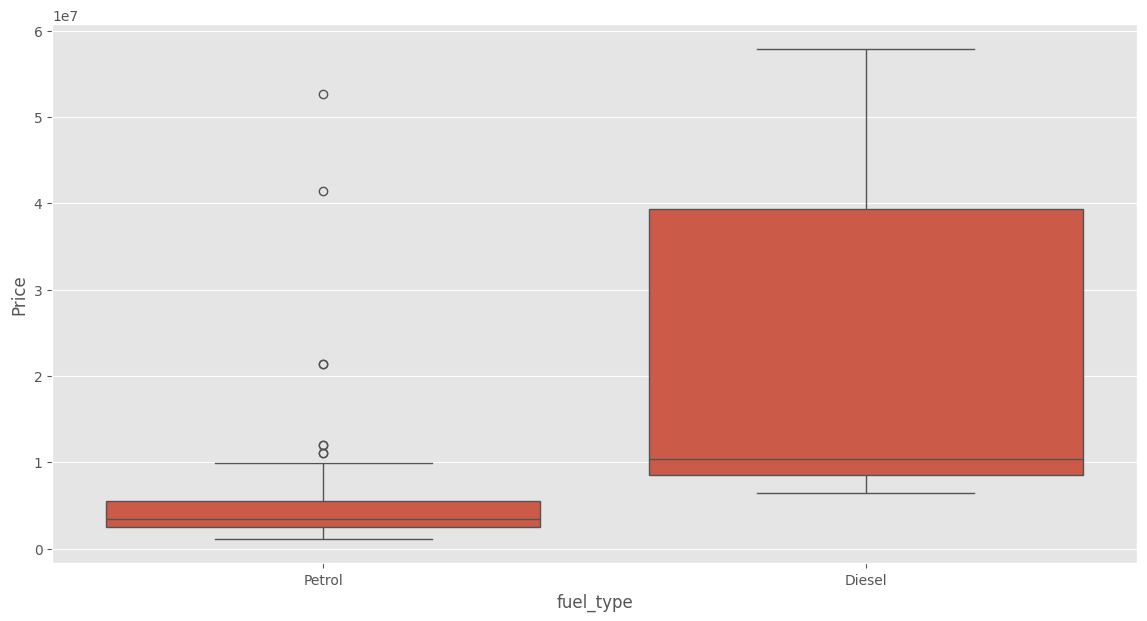

In [114]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

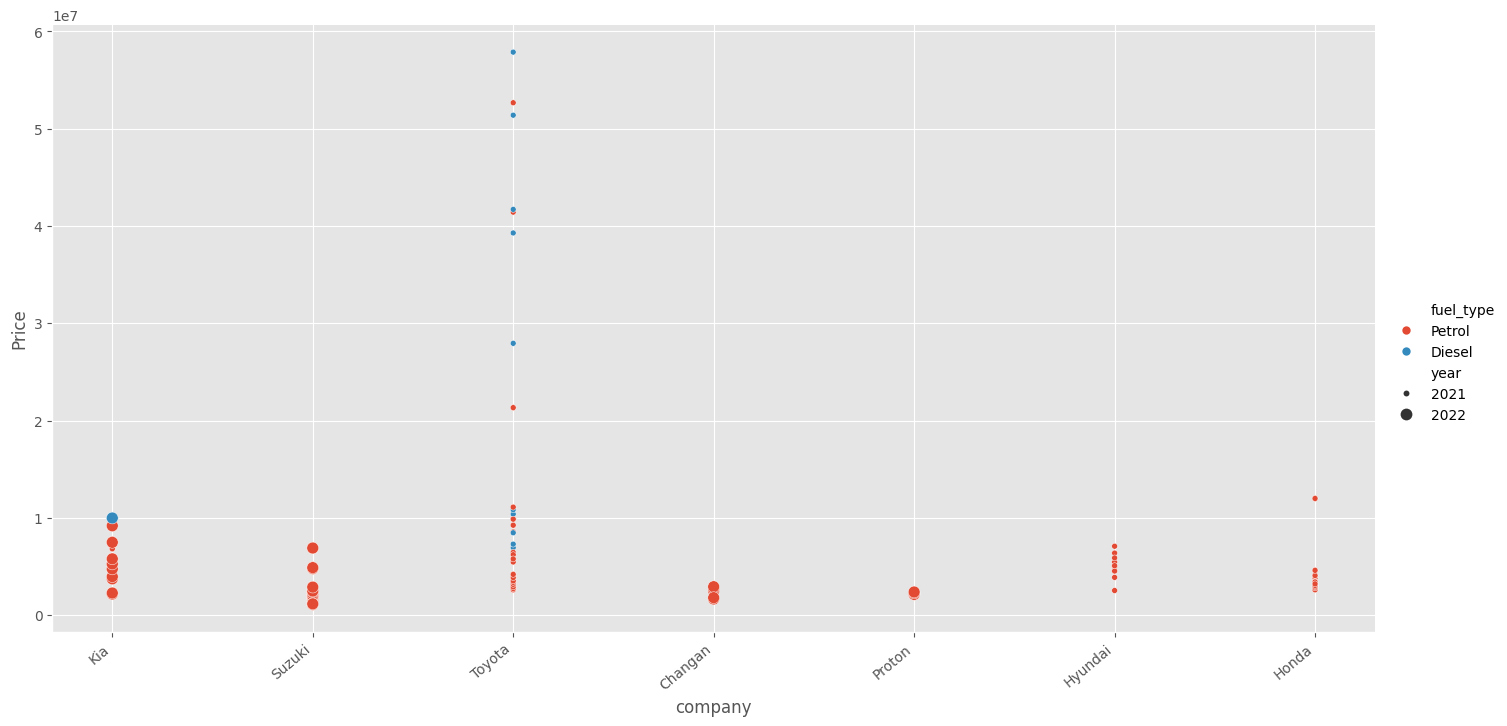

In [115]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [116]:
X=car[['name','company','year','suspension','fuel_type']]
y=car['Price']

In [117]:
X

,name,company,year,suspension,fuel_type
0,Kia Picanto,Kia,2022,Manual,Petrol
1,Kia Picanto,Kia,2022,Automatic,Petrol
2,Kia Stonic EX,Kia,2022,Automatic,Petrol
3,Kia Stonic EX+,Kia,2022,Automatic,Petrol
4,Kia Sportage Alpha,Kia,2022,Automatic,Petrol
...,...,...,...,...,...
133,Honda City MT,Honda,2021,Automatic,Petrol
134,Honda City CVT,Honda,2021,Automatic,Petrol
135,Honda City,Honda,2021,Automatic,Petrol
136,Honda City Aspire MT,Honda,2021,Automatic,Petrol


In [118]:
y.shape

(138,)

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [121]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','suspension','fuel_type']])

OneHotEncoder()

In [122]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','suspension','fuel_type']),
                                    remainder='passthrough')

In [123]:
lr=LinearRegression()

In [124]:
pipe=make_pipeline(column_trans,lr)

In [125]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Changan Alsvin Comfort', 'Changan Alsvin Lumiere',
       'Changan Karvaan', 'Changan Karvaan Plus', 'Honda Accord Turbo',
       'Honda Aspire CVT', 'Honda BRV S', 'Honda City ',
       'Honda City Aspire MT', 'Honda City CVT', 'Honda City MT',
       'Honda Civic CVT...
       'Toyota Yaris ATIV CVT', 'Toyota Yaris ATIV M/T',
       'Toyota Yaris ATIV X', 'Toyota Yaris GLI CVT',
       'Toyota Yaris GLI M/T'], dtype=object),
                                                                            array(['Changan', 'Honda', 'Hyundai', 'Kia', 'Proton', 'Suzuki', 'Toyota'],
      dtype=object),
                                                                            array(['Automatic', 'Hybrid', 'Manual'], dtype=object),
                                                                            array(['Diesel', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'suspension',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [126]:
y_pred=pipe.predict(X_test)

In [127]:
r2_score(y_test,y_pred)

0.11634911273498805

In [128]:
scores=[]
for i in range(175):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [129]:
np.argmax(scores)

117

In [130]:
scores[np.argmax(scores)]

0.9857134076895097

In [131]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Kia Picanto','Kia',2021,'Manual','Petrol']).reshape(1,5)))

array([3939038.09612083])

In [132]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9857134076895097

In [133]:
import pickle

In [134]:
pickle.dump(pipe,open('LinearRegressionModel333.pkl','wb'))

In [135]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Kia Picanto','Kia',2021,'Manual','Petrol']).reshape(1,5)))

array([4289493.36894894])

In [136]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Changan Alsvin Comfort', 'Changan Alsvin Lumiere',
       'Changan Karvaan', 'Changan Karvaan Plus', 'Honda Accord Turbo',
       'Honda Aspire CVT', 'Honda BRV S', 'Honda City ',
       'Honda City Aspire MT', 'Honda City CVT', 'Honda City MT',
       'Honda Civic CVT', 'Honda Civic Oriel', 'Honda Civic Turbo',
       'Hyundai Elentra GLS', 'Hyundai Grand Starex GL',
       'Hyundai Grand Starex GLS', 'Hyundai Porter H100',
       'Hyundai Sonata 2.0', 'Hyundai Sonata 2.5', 'Hyundai Tuscon AWD',
       'Hyundai Tuscon FWD', 'Kia Carnival GLS', 'Kia Carnival GLS+',
       'Kia Picanto', 'Kia Sorento AWD', 'Kia Sorento FWD',
       'Kia Sportage AWD', 'Kia Sportage Alpha', 'Kia Sportage FWD',
       'Kia Stonic EX', 'Kia Stonic EX+', 'Proton Saga ACE',
       'Proton Saga AT', 'Proton Saga MT', 'Suzuki APV 1.5L',
       'Suzuki Alto VX', 'Suzuki Alto VXL', 'Suzuki Alto VXR',
       'Suzuki Bolan', 'Suzuki Cultus AGS', 'Suzuki Cultus VXL',
       'Suzuki Cultus VXR', 'Suzuki Jimn